In [19]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import random
plt.rcParams.update({'font.size': 14})

# Задача №1

#### Постановка:

Рассмотрим математическую модель устойчивой и неусточивой системы вида:
$$
\dot x = -x
$$
$$
\dot x = x
$$

#### Задание:
1. Построить точное решение
2. Численное решение методом Эйлера и Рунге-Кутта 4-го порядка
3. Построить график ошибок методов по сравнению с точным решением

#### Решение:

Аналитическое решение:

$x = e^{-x} \cdot x_0$ для системы $\dot x = -x$

$x = e^{x} \cdot x_0$ для системы $\dot x = x$

In [2]:
def expected_stable(x, x0):
    return np.exp(-x)*x0

def expected_unstable(x, x0):
    return np.exp(x)*x0

Численное решение задачи Коши $y' = f(x, y), y(a) = y_0$ на отрезке $[a, b]$ состоит в построении таблицы приближённых значений $y_0, y_1, ..., y_i, ..., y_N$ решения $y = y(x), y(x_i) ≈ y_i, ...$

Простейший одношаговый метод численного решения задачи Коши — *метод Эйлера*. В методе Эйлера величины $y_i$ вычисляются по формуле: $y_{i+1} = y_i + h\cdot f(x_i, y_i)$

In [3]:
def euler(f, y0, h, n):
    y = np.empty((np.size(y0), n))  
    y[:,0] = y0
    for i in range(1, n):
        y[:,i] = y[:,i - 1] + h * f(i*h, y[:,i-1])
    return y

Метод Рунге-Кутты используют для расчета стандартных моделей достаточно часто, так как при небольшом объеме вычислений он обладает точностью метода $Ο(h^4)$.

$$\frac{dy}{dx} = f(x, y(x)), y(a) = y_0$$

Классический метод Рунге-Кутта 4-го порядка описывается следующей системой пяти равенств:

$$y(x_{k+1}) = y(x_k) + \frac{h}{6}(k_1+2k_2+2k_3+k_4)$$

Где

$$ 
\begin{cases}
k_1 = f(x_k, y_k),\\
k_2 = f(x_k + \frac{h}{2}, y_k + \frac{hk_1}{2}),\\
k_3 = f(x_k + \frac{h}{2}, y_k + \frac{hk_2}{2}),\\
k_4 = f(x_k + h, y_k + hk_3), \\
\end{cases}
$$

In [4]:
def runge(f, y0, h, n):
    y = np.empty((np.size(y0), n))  
    y[:,0] = y0
    
    for i in range(1, n):
        k1 = f(i*h, y[:,i - 1])
        k2 = f(i*h + h/2, y[:,i - 1] + h/2*k1)
        k3 = f(i*h + h/2, y[:,i - 1] + h/2*k2)
        k4 = f(i*h + h, y[:,i - 1] + h*k3)
    
        y[:,i] = y[:,i - 1] + h/6*(k1 + 2*k2 + 2*k3 + k4)
    return y

Пусть $x_0 = 10$ - начальное условие  $\Delta t = 0.3$ - шаг по времени $n = 20$ - количество шагов.

In [5]:
x0, dt, n = 10.0, 0.3, 20
t = np.arange(0, dt*n, dt)

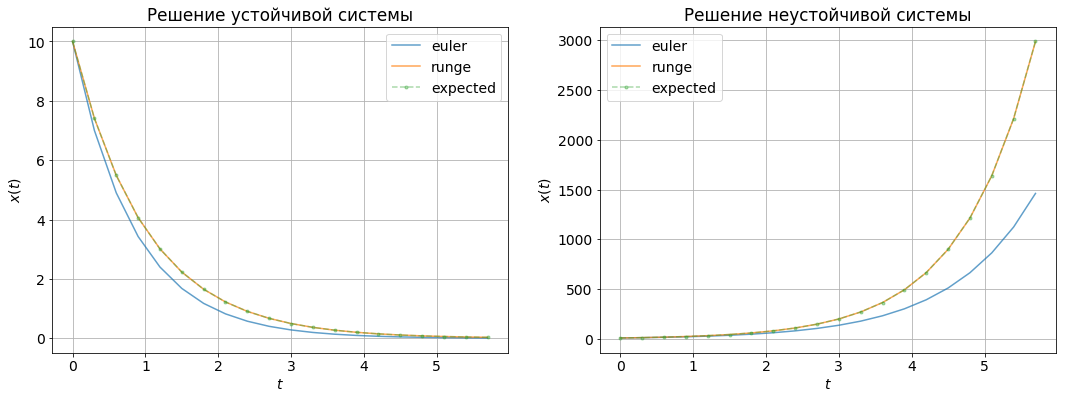

In [6]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

stable = (ax1, lambda t, x: -x, expected_stable, "Решение устойчивой системы")
unstable = (ax2, lambda t, x: x, expected_unstable, "Решение неустойчивой системы")

for ax, f, expected, title in (stable, unstable):
    x_euler = euler(f, x0, dt, n)[0]
    x_runge = runge(f, x0, dt, n)[0]
    x_expected = expected(t, x0)

    ax.set_title(title)
    ax.plot(t, x_euler, alpha = 0.7, label='euler')
    ax.plot(t, x_runge, alpha = 0.7, label='runge')
    ax.plot(t, x_expected, '.--', alpha = 0.4, label='expected')

    ax.legend()
    ax.grid(True)
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$x(t)$')

На графике видно, что численное решение Рунге-Кутта совпадает с точным решением, в решение методом Эйлера очень приблеженно.

Под ошибкой методов будем понимать разницу $\Delta x = |x(t) - x^*(t)|$, где $x(t)$ точное решение, а $x^*(t)$ - полученное численное. Тогда графики ошибок будет выглядеть следующим образом:

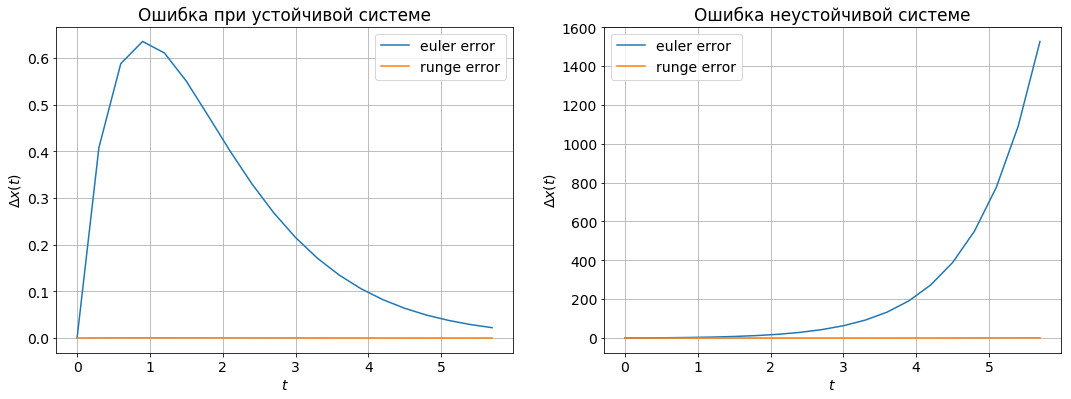

In [7]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

stable = (ax1, lambda t, x: -x, expected_stable, "Ошибка при устойчивой системе")
unstable = (ax2, lambda t, x: x, expected_unstable, "Ошибка неустойчивой системе")

for ax, f, expected, title in (stable, unstable):
    x_euler = euler(f, x0, dt, n)[0]
    x_runge = runge(f, x0, dt, n)[0]
    x_expected = expected(t, x0)
    
    euler_error = np.abs(x_euler - x_expected)
    runge_error = np.abs(x_runge - x_expected)

    ax.set_title(title)
    ax.plot(t, euler_error, label='euler error')
    ax.plot(t, runge_error, label='runge error')

    ax.legend()
    ax.grid(True)
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$\Delta x(t)$')

В случае устойчивой системы Эйлер накапливает ошибку, но в силу устойчивости, он сходится все равно к точному решению. В случае неутойчивой системы метод накапливает ошибку и уходит экспоненциально от точного решения с ростом $t$. Рунге-Кутта в обоих ситуациях близок к истинному ответу.

# Задача №2

#### Постановка:

Рассмотрим математическую модель математического маятника вида:
$$
\ddot x + x = 0
$$

#### Задание:
1. Построить точное решение
2. Численное решение методом Эйлера и Рунге-Кутта 4-го порядка
3. Построить график ошибок методов по сравнению с точным решением

#### Решение:

Уравнение эквивалетна системе:

$$
\begin{cases}
\dot x_1 = x_2 \\
\dot x_2 = -x_1
\end{cases}
$$

Где $x_1 = x$ и $x_2 = \dot x$. При $x_1(0)=0$ и $x_2(0)=1$ система имеет решение:

$$
\begin{cases}
x_1(t) = sin(t) \\
x_2(t) = cos(t)
\end{cases}
$$

Решим и посмотрим на поведение при $x_1 = x$

In [8]:
dt, n = 0.2, 100
x0 = [0, 1]
t = np.arange(0, dt*n, dt)

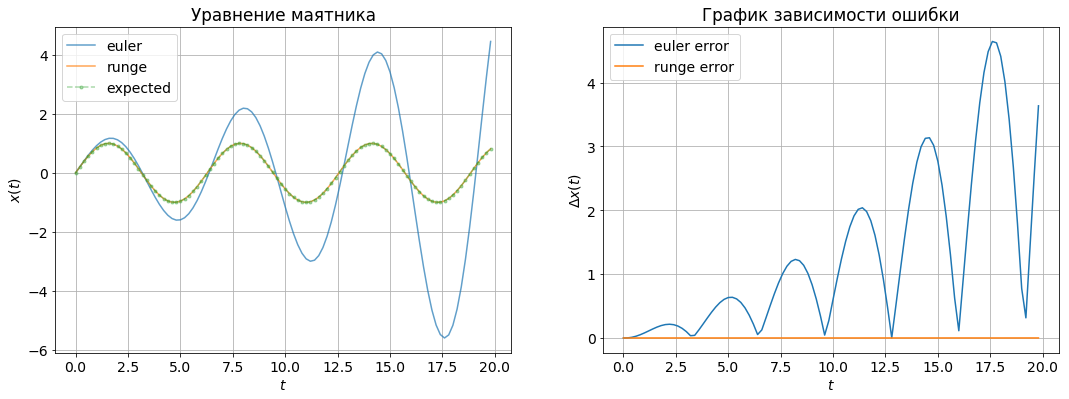

In [9]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

f = lambda t, x: np.array((x[1], -x[0]))
expected = lambda x: np.array((np.sin(x), np.cos(x)))

x_euler = euler(f, x0, dt, n)[0]
x_runge = runge(f, x0, dt, n)[0]
x_expected = expected(t)[0]

ax1.set_title("Уравнение маятника")
ax1.plot(t, x_euler, alpha = 0.7, label='euler')
ax1.plot(t, x_runge, alpha = 0.7, label='runge')
ax1.plot(t, x_expected, '.--', alpha = 0.4, label='expected')

ax1.legend()
ax1.grid(True)
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$x(t)$')

ax2.set_title(r"График зависимости ошибки")

euler_error = np.abs(x_euler - x_expected)
runge_error = np.abs(x_runge - x_expected)

ax2.plot(t, euler_error, label='euler error')
ax2.plot(t, runge_error, label='runge error')

ax2.legend()
ax2.grid(True)
ax2.set_xlabel(r'$t$')
ax2.set_ylabel(r'$\Delta x(t)$')
pass

Метод Эйлера переодично расходится от точного решения. Метод Рунге-Кутта решает систему гораздо точнее

# Задача №3

#### Постановка:

Рассмотрим систему Рёсслера:
$$
\begin{cases}
\dot x = - y - z \\
\dot y = x + ay \\
\dot z = b + (x - r)z \\
\end{cases}
$$

#### Задание:

1. Численное решить систему методом Эйлера и Рунге-Кутта 4-го порядка при $a=b=0.2$ и $r = 5.7$
2. Построить график ошибок методов по сравнению с точным решением
3. Построить график зависимости $y(x)$ и $z(x)$


#### Решение:

In [10]:
dt, n = 0.01, 10000
x0 = (0, 0, 0.035)
t = np.arange(0, dt*n, dt)
a = b = 0.2
r = 5.7

def rossler(t, xm):
    x, y, z = xm
    dx = -y - z
    dy = x + a*y
    dz = b + (x - r)*z
    return np.array((dx, dy, dz))

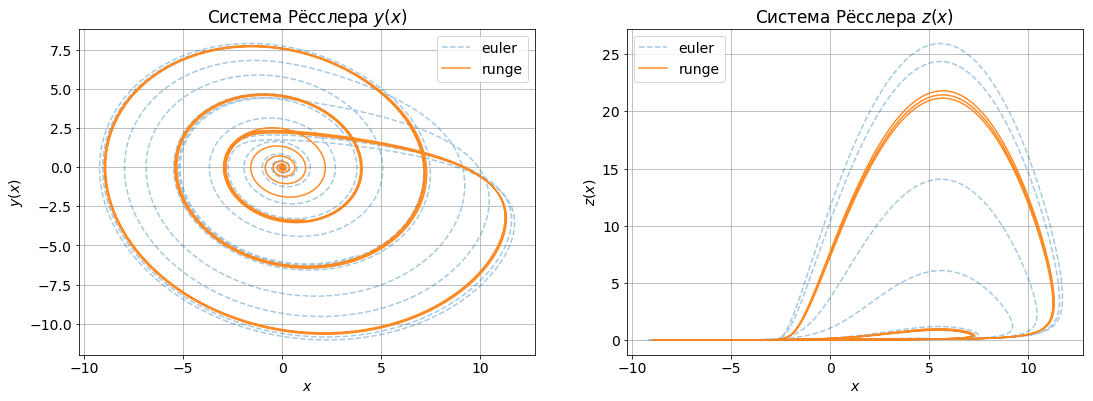

In [11]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x_euler, y_euler, z_euler = euler(rossler, x0, dt, n)
x_runge, y_runge, z_runge = runge(rossler, x0, dt, n)

ax1.plot(x_euler, y_euler, '--', alpha = 0.4, label='euler')
ax1.plot(x_runge, y_runge, alpha = 0.9, label='runge')
ax2.plot(x_euler, z_euler, '--', alpha = 0.4, label='euler')
ax2.plot(x_runge, z_runge, alpha = 0.9, label='runge')

ax1.set_title(r'Система Рёсслера $y(x)$');
ax2.set_title(r'Система Рёсслера $z(x)$')
ax1.legend();              ax2.legend()
ax1.grid(True);            ax2.grid(True)
ax1.set_xlabel(r'$x$');    ax2.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y(x)$'); ax2.set_ylabel(r'$z(x)$')
pass

У нас нет точного решения, поэтому будем сравнивать решение метотодов с меньшим шагом.

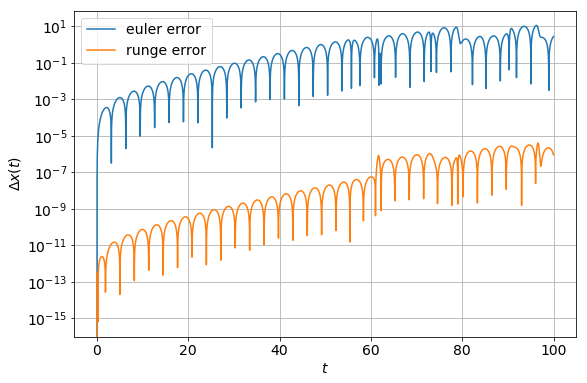

In [12]:
fig = plt.figure(figsize=(9,6))
ax2 = fig.add_subplot(111)

alpha = 10

x_euler, y_euler, z_euler = euler(rossler, x0, dt, n)
x_euler_2, y_euler_2, z_euler_2= euler(rossler, x0, dt/alpha, n*alpha)

x_euler_2 = x_euler_2[::alpha]; y_euler_2 = y_euler_2[::alpha]; z_euler_2 = z_euler_2[::alpha]

x_runge, y_runge, z_runge = runge(rossler, x0, dt, n)
x_runge_2, y_runge_2, z_runge_2 = runge(rossler, x0, dt/alpha, n*alpha)

x_runge_2 = x_runge_2[::alpha]; y_runge_2 = y_runge_2[::alpha]; z_runge_2 = z_runge_2[::alpha]

euler_error = np.abs(x_euler_2 - x_euler)
runge_error = np.abs(x_runge_2 - x_runge)

ax2.plot(t, euler_error, label='euler error')
ax2.plot(t, runge_error, label='runge error')

ax2.legend()
ax2.grid(True)
ax2.set_yscale('log')
ax2.set_xlabel(r'$t$')
ax2.set_ylabel(r'$\Delta x(t)$')
pass

Ошибки растут, это может произойти того, что метод с меньшим шагом из-за хаотичного движения, перешел на другую траекторию, и разошелся с более точным методом.

# Задача №4

#### Постановка:
Рассмотрим задачу математического моделирования диссоциации (распада) вещества, которая описывается уравнением
$$ \dot x = −𝑥 $$

#### Задание:

1. Построить графики численных решений наивным алгоритмом и алгоритмом Джиллеспи, и точного решения
2. Сравнить время работы алгоритмов

#### Решение:

In [92]:
def stable_solution(t, x0):
    return  x0*np.exp(t)

In [93]:
def native_algorithm(a, x0, reaction_coefficients_function, reaction_functions,  delta_t, t_max):
    x = x0
    t = 0.0
    points = [(t, x)]
    while t < t_max:
        p = random.random()
        curr_right_border = 0
        reaction_coefficients = [f(a, x) for f in reaction_coefficients_function]
        for i in range(0, len(a)):
            curr_right_border += reaction_coefficients[i]*delta_t
            if p <= curr_right_border:
                x = reaction_functions[i](x)
                break
        t += delta_t
        points.append((t, list(x)))
    return points

In [94]:
def gillespie_algorithm(a, x0, reaction_coefficients_function, reaction_functions, t_max):
    x = x0
    t = 0
    points = [(t, x)]
    while t < t_max:
        p1 = random.random()
        coefficients = [f(a, x) for f in reaction_coefficients_function]
        a0 = sum(coefficients)
        if a0 != 0:
            tau = (1.0/a0)*np.log(1.0/p1)
            p2 = random.random()
            curr_right_border = 0
            for i in range(0, len(a)):
                curr_right_border += coefficients[i] / a0
                if p2 <= curr_right_border:
                    x = reaction_functions[i](x)
                    break
            t += tau
        else:
            t = t_max
        points.append((t, list(x)))
    return points

In [96]:
a = [1.0]
x0 = [100.0]
t_max, t_step = 20.0, 1e-4 

Average time of the native algorithm: 869.7916666666666 ms
Average time of the gillespie algorithm: 10.416666666666666 ms


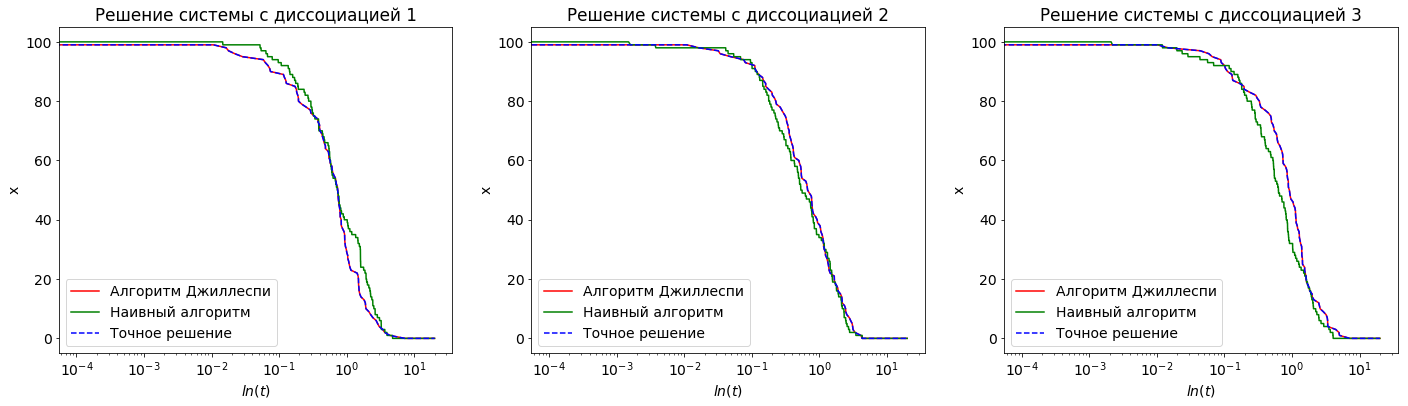

In [98]:
fig, ax = plt.subplots(1, 3, figsize=(24,6), sharex=True)
reaction_coefficients_function = [lambda a, x: a[0] * x[0]]
reaction_functions = [lambda x: [x[0] - 1]]
nativeTime = 0
gillespieTime = 0
for i in range(0, 3):
    start_time = time.process_time()
    points = native_algorithm(a, x0, reaction_coefficients_function, reaction_functions, t_step, t_max)
    nativeTime += time.process_time() - start_time
    x_n, y_n = zip(*points)

    start_time = time.process_time()
    points = gillespie_algorithm(a, x0, reaction_coefficients_function, reaction_functions, t_max)
    gillespieTime += time.process_time() - start_time
    x_g, y_g = zip(*points)
    
    while t < t_max:
        points.append((t, stable_solution(t, x0)[0]))
        t += t_step
    x, y = zip(*points)
    
    ax[i].plot(x_g, [elem[0] for elem in y_g], 'r', label='Алгоритм Джиллеспи')
    ax[i].plot(x_n, [elem[0] for elem in y_n], 'g', label='Наивный алгоритм')
    ax[i].plot(x, y, 'b--', label='Точное решение')
    ax[i].legend()
    ax[i].set_title('Решение системы с диссоциацией {}'.format(i + 1))
    ax[i].set_xlabel(r'$ln(t)$')
    ax[i].set_ylabel('x')
    ax[i].set_xscale('log')

average_g = gillespieTime / 3.0
average_n = nativeTime / 3.0
print("Average time of the native algorithm: {} ms".format(average_n*1000))
print("Average time of the gillespie algorithm: {} ms".format(average_g*1000))
pass

Видим, что наивный алгоритм и алгоритм Джиллеспи достаточно хорошо сходятся к точному решению. Алгоритм Джиллеспи работает быстрее, чем наивный алгоритм, почти в 86 раз!

# Задача №5

#### Постановка:

Процессы синтеза молекул водорода из атомов водорода и процесс распада молекул водорода на атомарный водород описывается системой дифференциальных уравнений 

$$ 
\begin{cases}
\dot x_1=2𝛾𝑥_2−2𝑎𝑥_1^2 \\
\dot x_2=𝑎𝑥_1^2−𝛾𝑥_2
\end{cases}
$$

Где $𝑥_1$ – число атомов водорода, $𝑥_2$ – число молекул водорода.

Изменение числа молекул и атомов в процессе синтеза с коэффициентом $𝑎𝑥_1^2$ можно описать как

$$ 
\begin{cases}
𝑥_1→ 𝑥_1−2 \\
𝑥_2→𝑥_2+1
\end{cases}
$$

Изменение числа молекул и атомов в процессе диссоциации с коэффициентом $𝛾𝑥_2$ можно описать как

$$ 
\begin{cases}
𝑥_1→ 𝑥_1 + 2 \\
𝑥_2→𝑥_2-1
\end{cases}
$$

#### Задание:

1. Решить наивным алгоритмом и алгоритмом Джиллеспи и методом Рунге-Кутта.

#### Решение:


In [128]:
def dissociation_process(t, x):
    a = g = 1.0
    dx1 = 2*g*x[1] - 2*a*(x[0]*x[0])
    dx2 = a*(x[0]*x[0]) - g*x[1]
    return bp.array(dx1, dx2)

In [129]:
t_max = 0.25
delta_t = 1e-4
x0 = [100.0, 0.0]
a = [1.0, -1.0]

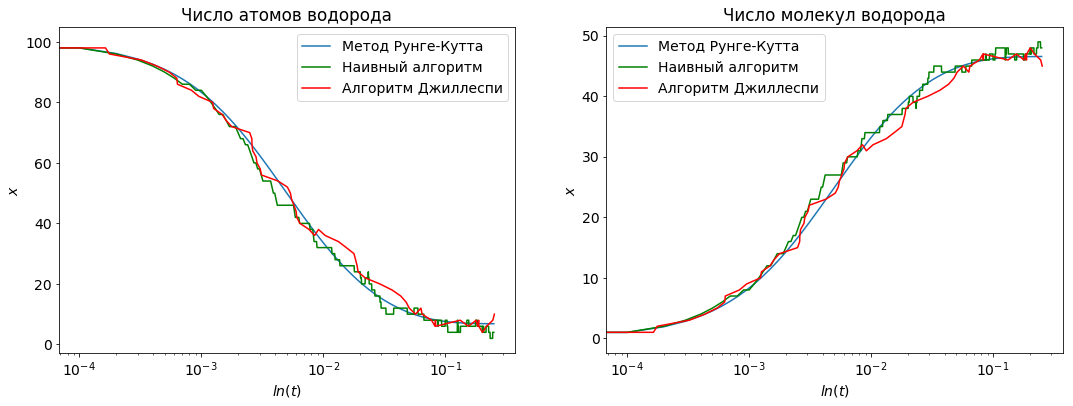

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6), sharex=True)

coefficients_function = [lambda a, x: a[0] * x[0] * x[0], lambda a, x: -a[1] * x[1]]
functions = [lambda x: [x[0] - 2, x[1] + 1], lambda x: [x[0] + 2, x[1] - 1]]

points = runge(dissociation_process, x0, delta_t, int(t_max/delta_t))
x_rk, y_rk = zip(*points)
points = native_algorithm(a, x0, coefficients_function, functions, delta_t, t_max)
x_n, y_n = zip(*points)
points = gillespie_algorithm(a, x0, coefficients_function, functions, t_max)
x_g, y_g = zip(*points)

plt.xscale('log')

for (i, ax, title) in ((0, ax1, "Число атомов водорода"), (1, ax2, "Число молекул водорода")):    
    ax.plot(x_rk, [elem[i] for elem in y_rk], label='Метод Рунге-Кутта')
    ax.plot(x_n, [elem[i] for elem in y_n], 'g', label='Наивный алгоритм')
    ax.plot(x_g, [elem[i] for elem in y_g], 'r', label='Алгоритм Джиллеспи')
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel('$ln(t)$')
    ax.set_ylabel('$x$')
    ax.set_xscale('log')
pass

Видно, что все графики приближены к одной кривой, нет больших расхождений.